In [1]:
import numpy as np
import pyaudio
import audio_metadata
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

data_path = 'data/crblp/wav/'
audiofiles = [join(data_path,f) for f in listdir(data_path) if isfile(join(data_path, f))]

In [2]:
print(audiofiles[0])
print(len(audiofiles))

data/crblp/wav/13879.wav
10895


In [3]:
metadata = audio_metadata.load(audiofiles[0])
print(metadata, '\n')
print(type(metadata.streaminfo.duration))
print(metadata.streaminfo.duration,'in seconds')

<WAV ({
    'filepath': '/home/jakfromspace/Code/Python/BanglaNLP/data/crblp/wav/13879.wav',
    'filesize': '358.56 KiB',
    'pictures': [],
    'streaminfo': <WAVStreamInfo ({
        'bit_depth': 16,
        'bitrate': '706 Kbps',
        'channels': 1,
        'duration': '00:04',
        'sample_rate': '44.1 KHz',
    })>,
    'tags': <RIFFTags ({})>,
})> 

<class 'float'>
4.16233560090703 in seconds


In [4]:
listofdurations = []
countofbadwaves = 0
for wavfile in audiofiles:
    try:
        meta = audio_metadata.load(wavfile)
        listofdurations.append(meta.streaminfo.duration)
    except:
        countofbadwaves += 1
        print(wavfile,'has bad header')

print('Length of Wavfile Durations List:',len(listofdurations))
print('No. of Bad header Wavfiles:',countofbadwaves)

data/crblp/wav/15397.wav has bad header
Length of Wavfile Durations List: 10894
No. of Bad header Wavfiles: 1


In [5]:
listofdurations.sort()
print('Audio Time Stats')
print('----------------')
print('Size of Array:',len(listofdurations))
print('Maximum:',round(max(listofdurations),2))
print('Minimum:',round(min(listofdurations),2))
print('Mean',round(sum(listofdurations)/len(listofdurations),2))
print('Median:',round(listofdurations[int(len(listofdurations)/2)],2))
print('LoQuart:',round(listofdurations[int(len(listofdurations)/2) - int(len(listofdurations)/4)],2))
print('UpQuart:',round(listofdurations[int(len(listofdurations)/2) + int(len(listofdurations)/4)],2))

Audio Time Stats
----------------
Size of Array: 10894
Maximum: 64.65
Minimum: 0.39
Mean 4.49
Median: 3.5
LoQuart: 2.08
UpQuart: 5.74


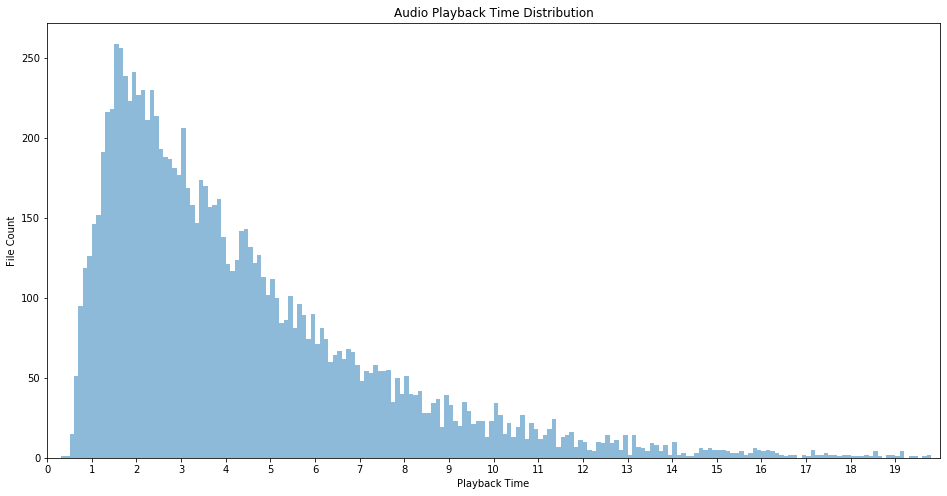

In [6]:
plt.figure(figsize=(16,8))
from matplotlib import pyplot as plt

# data = np.random.normal(0, 20, 1000) 
data = listofdurations

# fixed bin size
bins = np.arange(0, 20, 0.1) # fixed bin size

plt.xlim([0, 20])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Audio Playback Time Distribution')
plt.xticks(np.arange(0, 20, 1.0))
plt.xlabel('Playback Time')
plt.ylabel('File Count')

plt.show()

In [7]:
validtimes = []
for f in audiofiles:
    try:
        t = audio_metadata.load(f).streaminfo.duration
        if t>=1 and t<=2:
            validtimes.append(f)
    except:
        print('Bad Header:',f)
        
print(len(validtimes))
print(validtimes[0])
print(validtimes[len(validtimes)-1])

Bad Header: data/crblp/wav/15397.wav
2141
data/crblp/wav/17458.wav
data/crblp/wav/20970.wav


In [8]:
file = open('data_RangedAudiofileList_1to2.txt','w') 
for f in validtimes:
    file.write(f)
    file.write('\n')
file.close() 

In [28]:
import csv
import data_dekhabet as dkb
lookup = dkb.tokenlookup
leng = len(lookup)
countlook = [0]*leng


print(lookup)
print(leng)
print(countlook)

[' ', 'a', 'e', 'i', 'o', 'u', 'g', 'p', 'b', 'h', 's', 't', 'j', 'l', 'm', 'n', 'r', 'd', 'k', 'ng', 'ch', 'sh']
22
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
csvf = 'dekhabet_dataLabelsRanged.csv'
counter = []
with open(csvf, 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        ctext = []
        text = row[4]
        text = text.strip("'-!$[]")
        text = text.split(',')
        i=0
        if 'Tokens' in text:
            pass
        else:
            for t in range(0,len(text)):
                i = int(text[t])
                counter.append(lookup[i])
csvFile.close()

Counter({' ': 7220, 'a': 4129, 'e': 4083, 'o': 3967, 'h': 2548, 'i': 2446, 'k': 2066, 'r': 2064, 'n': 2025, 't': 1845, 'b': 1487, 'sh': 1122, 'l': 1048, 'ch': 1007, 'm': 933, 'u': 891, 'd': 788, 'p': 678, 'j': 655, 'g': 406, 's': 237, 'ng': 109})


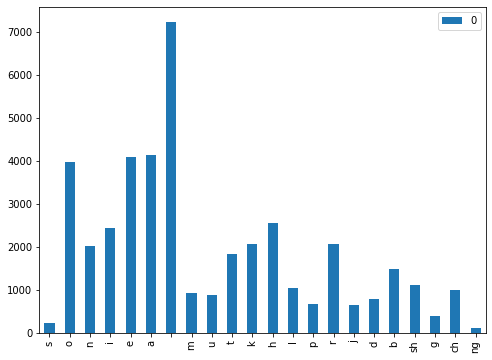

In [36]:
import pandas
from collections import Counter
a = ['a', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'e', 'e', 'e', 'e', 'e']
letter_counts = Counter(counter)
print(letter_counts)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',figsize=(8,6))